## ADSP 31009 - Predicting Song Popularity

#### Simran Karamchandani

### Background Information & Objective

Music production companies are constantly seeking ways to diversify their portfolio of music 
while also producing songs that will reach the charts. In building a model that predicts a song's 
popularity, music production companies will be able to successfully strategize future content, 
while effectively being able to forecast sales.

The following analysis explores the following dataset sourced from Kaggle 
< https://www.kaggle.com/code/eishkaran/spotify-music-recommendation
system/notebook> to develop a model that evaluates properties of songs and uncovers 
patterns that can predict how successful a song will be in the music industry. 

The measurable objective of this analysis is to maximize the r2 and minimize the MSE values as 
much as possible in order to ensure that the model effectively predicts the popularity of songs. 
Both metrics combined can justify the effectiveness of the model, as a large amount of variance 
can be thoroughly explained by the model with also a high measure of accuracy. 

### Key Assumptions

The dataset is assumed to be a representative sample and therefore, will not lead to bias.

The data is also assumed to be following a normal distribution and that there is consistent 
variation across all variables within the dataset. 

Hypothesis: Songs with higher energy levels and liveness are more likely to achieve a higher 
ranking in popularity. 

### Data Exploration / EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
df.dropna(inplace=True)

In [7]:
df_clean = df.drop_duplicates()

In [8]:
df.shape

(113999, 21)

In [9]:
df_clean.shape

(113999, 21)

#### Identifying qualitative and quantitative variables within dataset

In [10]:
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
print(categorical_variables)

Index(['track_id', 'artists', 'album_name', 'track_name', 'track_genre'], dtype='object')


In [11]:
sampled_df = df_clean.sample(n=1000) 

In [12]:
sampled_df_columns=sampled_df.columns

In [13]:
quantitative_variables_sampled = sampled_df.select_dtypes(include=['int', 'float']).columns
print(quantitative_variables_sampled)

Index(['Unnamed: 0', 'popularity', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


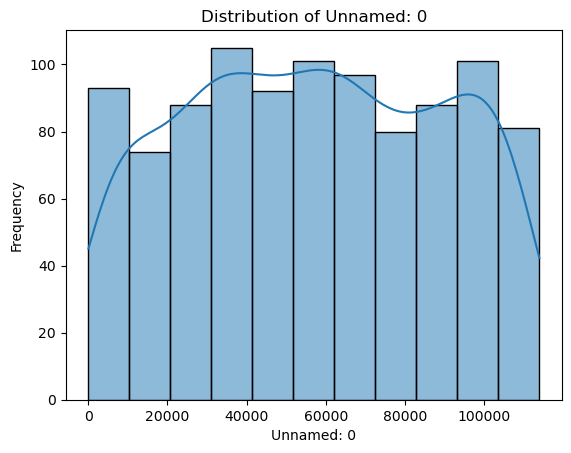

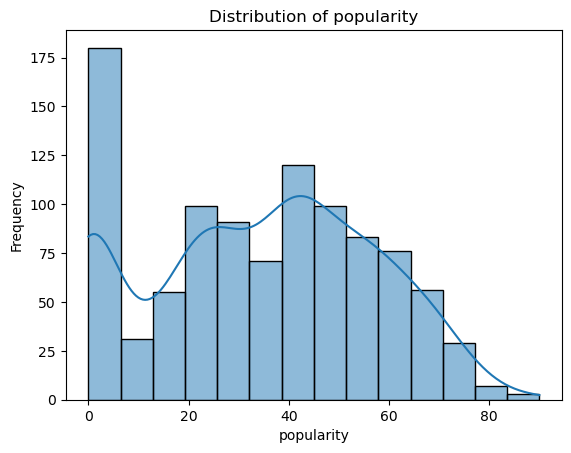

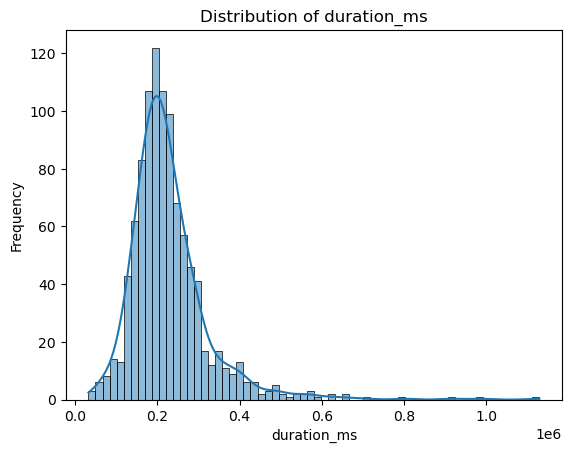

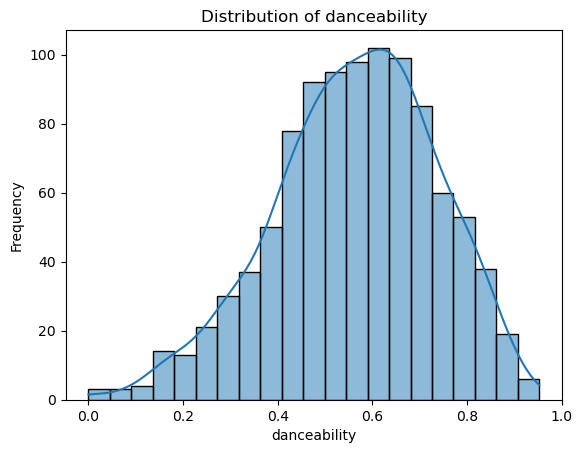

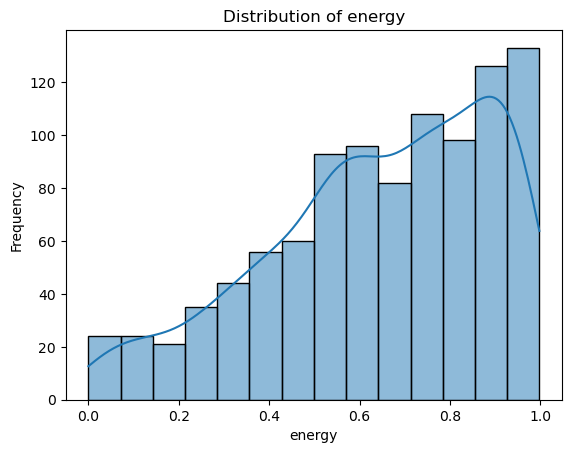

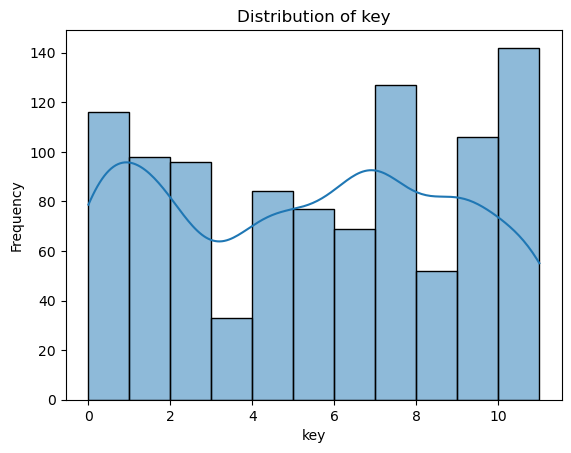

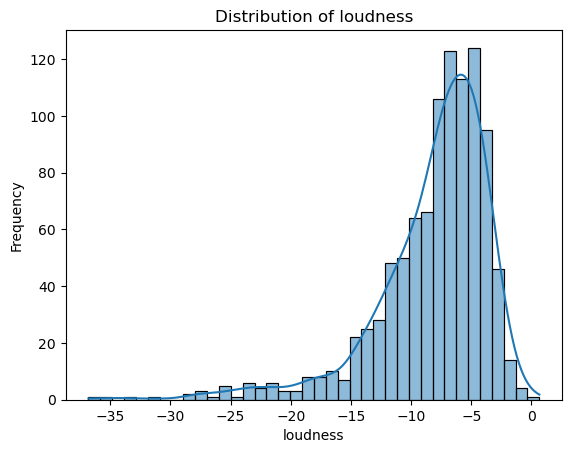

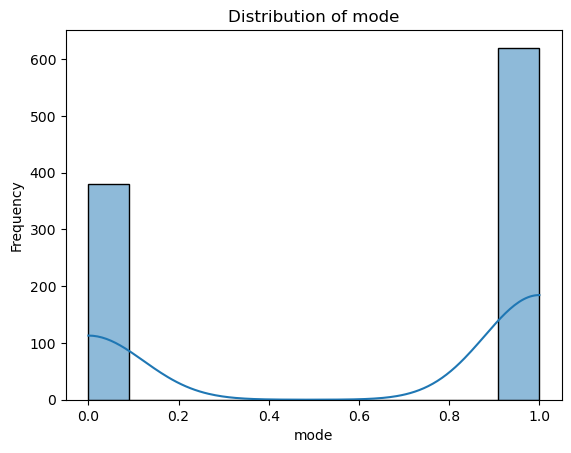

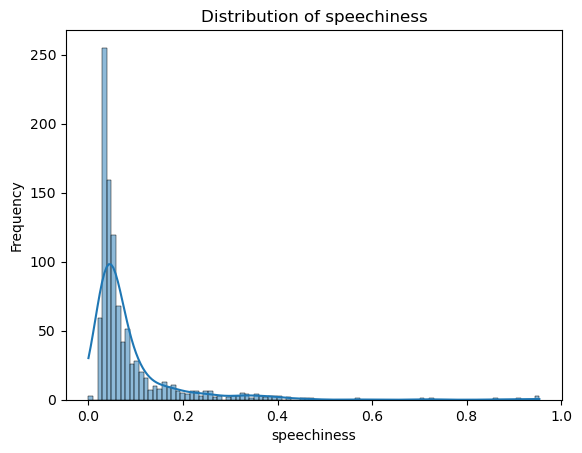

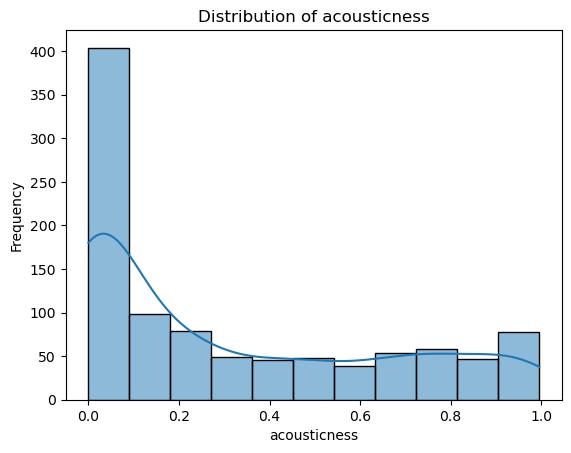

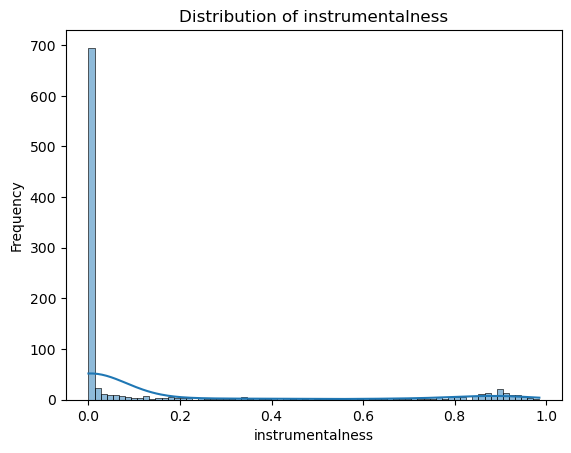

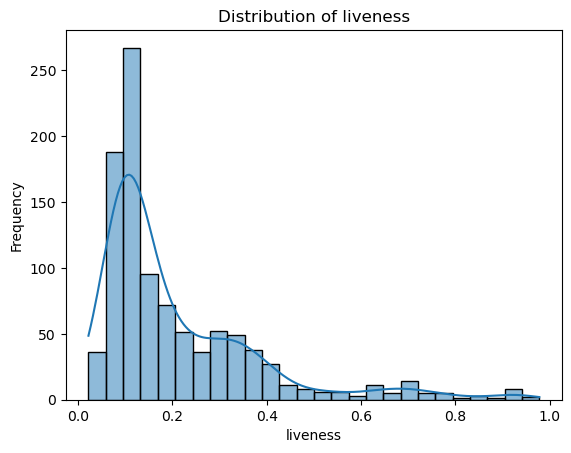

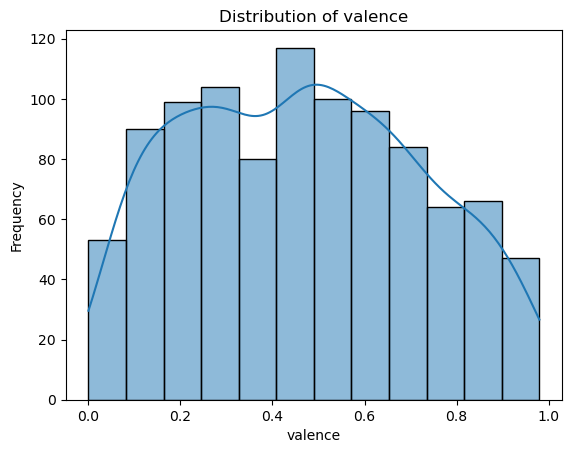

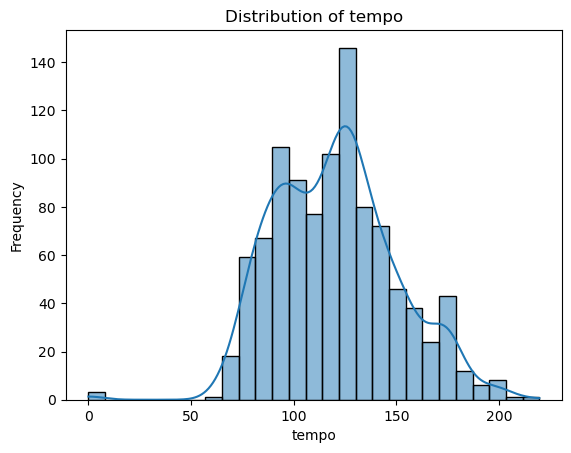

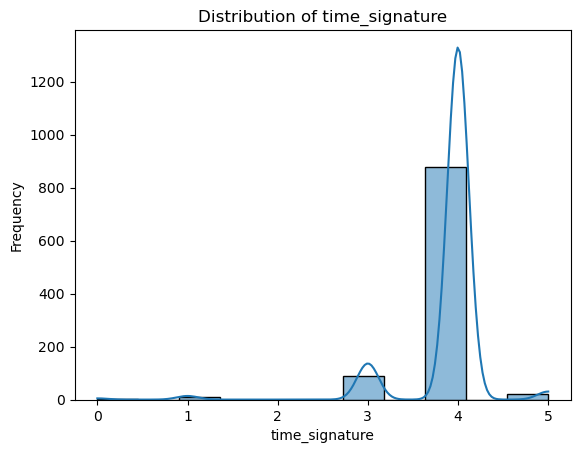

In [14]:
for column in quantitative_variables_sampled:
    plt.figure()
    sns.histplot(data=sampled_df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.show()

"Unnamed:0" is an unclear variable that will be taken out from further analysis, as additional information would be needed to better understand what is being measured.

As for "popularity," the distribution of this variable is not fully right-skewed, but does indicate that majority of the songs have low popularity scores. However, reasonable enough frequencies can also be found at popularity scores of 20, as well as 40-60.

"duration_ms," "speechiness," "acousticness," "instrumentalness," and "liveness" all have right-skewed distributions, which give insight into the type of songs being compared, showing that all are comparable in nature.

Similarly, "energy" and "loudness" have left-skewed distributions providing insight into the nature of the songs being compared.

"danceability," "key," "valence," and "tempo" follow a normal distribution.

In [15]:
corr=df_clean.corr()

C:\Users\svkar\AppData\Local\Temp\ipykernel_35016\3510875802.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_clean.corr()


In [16]:
corr

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032146,-0.032738,-0.054735,0.003445,-0.055993,-0.005521,-0.027307,0.005110,-0.084952,0.076837,-0.070285,0.033641,0.053109,-0.025825,-0.021115
popularity,0.032146,1.000000,-0.007129,0.044078,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076
duration_ms,-0.032738,-0.007129,1.000000,-0.065270,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229
explicit,-0.054735,0.044078,-0.065270,1.000000,0.122506,0.096954,0.004485,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387
danceability,0.003445,0.035444,-0.073435,0.122506,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219
energy,-0.055993,0.001053,0.058520,0.096954,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127
key,-0.005521,-0.003847,0.008123,0.004485,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064
loudness,-0.027307,0.050420,-0.003475,0.108587,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992
mode,0.005110,-0.013948,-0.035581,-0.037216,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090
speechiness,-0.084952,-0.044930,-0.062605,0.307951,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011


'Popularity' found to be most correlated with 'instrumentalness,' and 'loudness'

Following scatterplots made to visualize changes in popularity versus different variables, all indicating same level of distributions noted earlier.

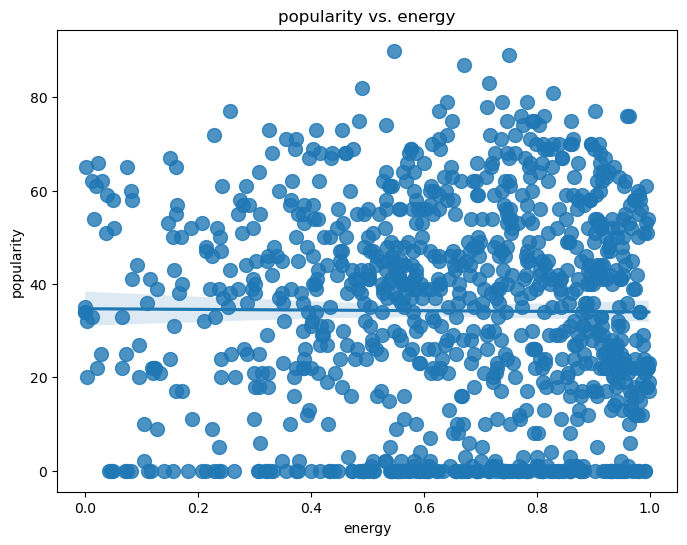

In [17]:
plt.figure(figsize=(8, 6))
sns.regplot(data=sampled_df, x='energy', y='popularity', scatter_kws={'s': 100}) 
plt.title('popularity vs. energy')
plt.xlabel('energy')
plt.ylabel('popularity')
plt.show()

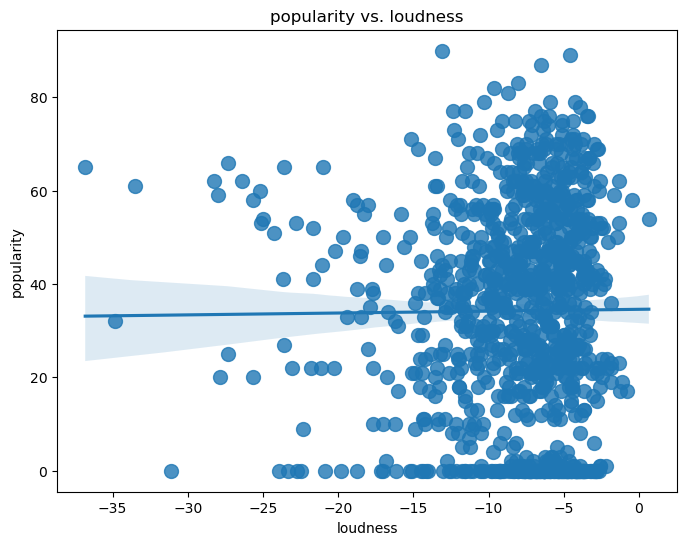

In [18]:
plt.figure(figsize=(8, 6))
sns.regplot(data=sampled_df, x='loudness', y='popularity', scatter_kws={'s': 100}) 
plt.title('popularity vs. loudness')
plt.xlabel('loudness')
plt.ylabel('popularity')
plt.show()

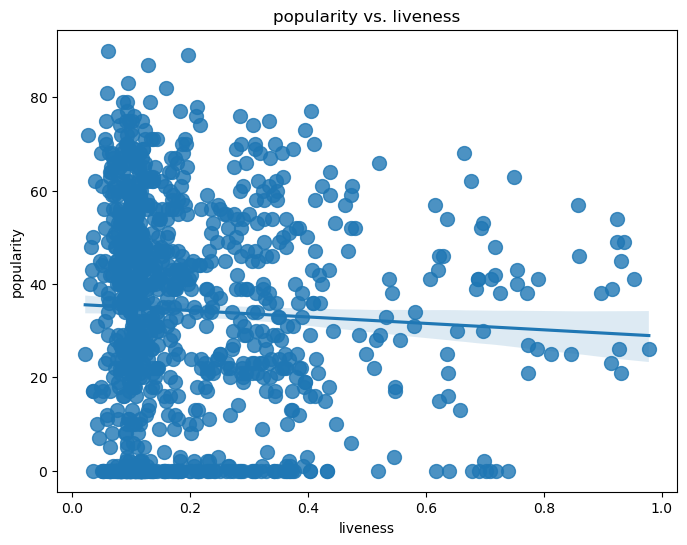

In [19]:
plt.figure(figsize=(8, 6))
sns.regplot(data=sampled_df, x='liveness', y='popularity', scatter_kws={'s': 100}) 
plt.title('popularity vs. liveness')
plt.xlabel('liveness')
plt.ylabel('popularity')
plt.show()

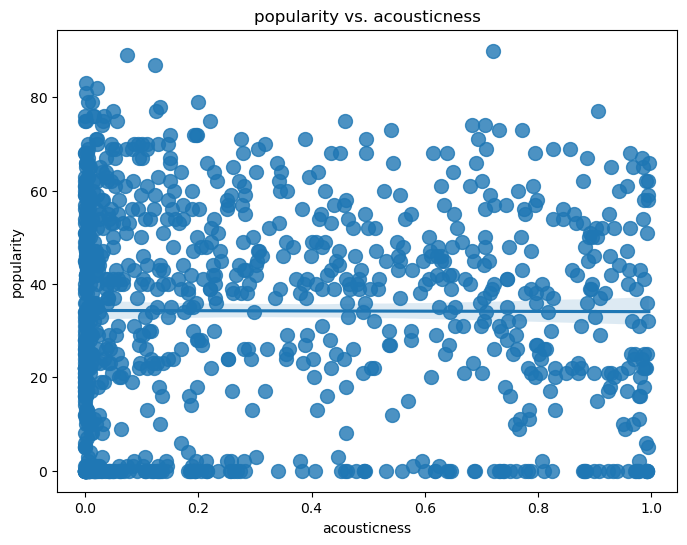

In [20]:
plt.figure(figsize=(8, 6))
sns.regplot(data=sampled_df, x='acousticness', y='popularity', scatter_kws={'s': 100}) 
plt.title('popularity vs. acousticness')
plt.xlabel('acousticness')
plt.ylabel('popularity')
plt.show()

In [21]:
missing_values=df.isnull().sum()
print(missing_values)

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


C:\Users\svkar\AppData\Local\Temp\ipykernel_35016\1085666427.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


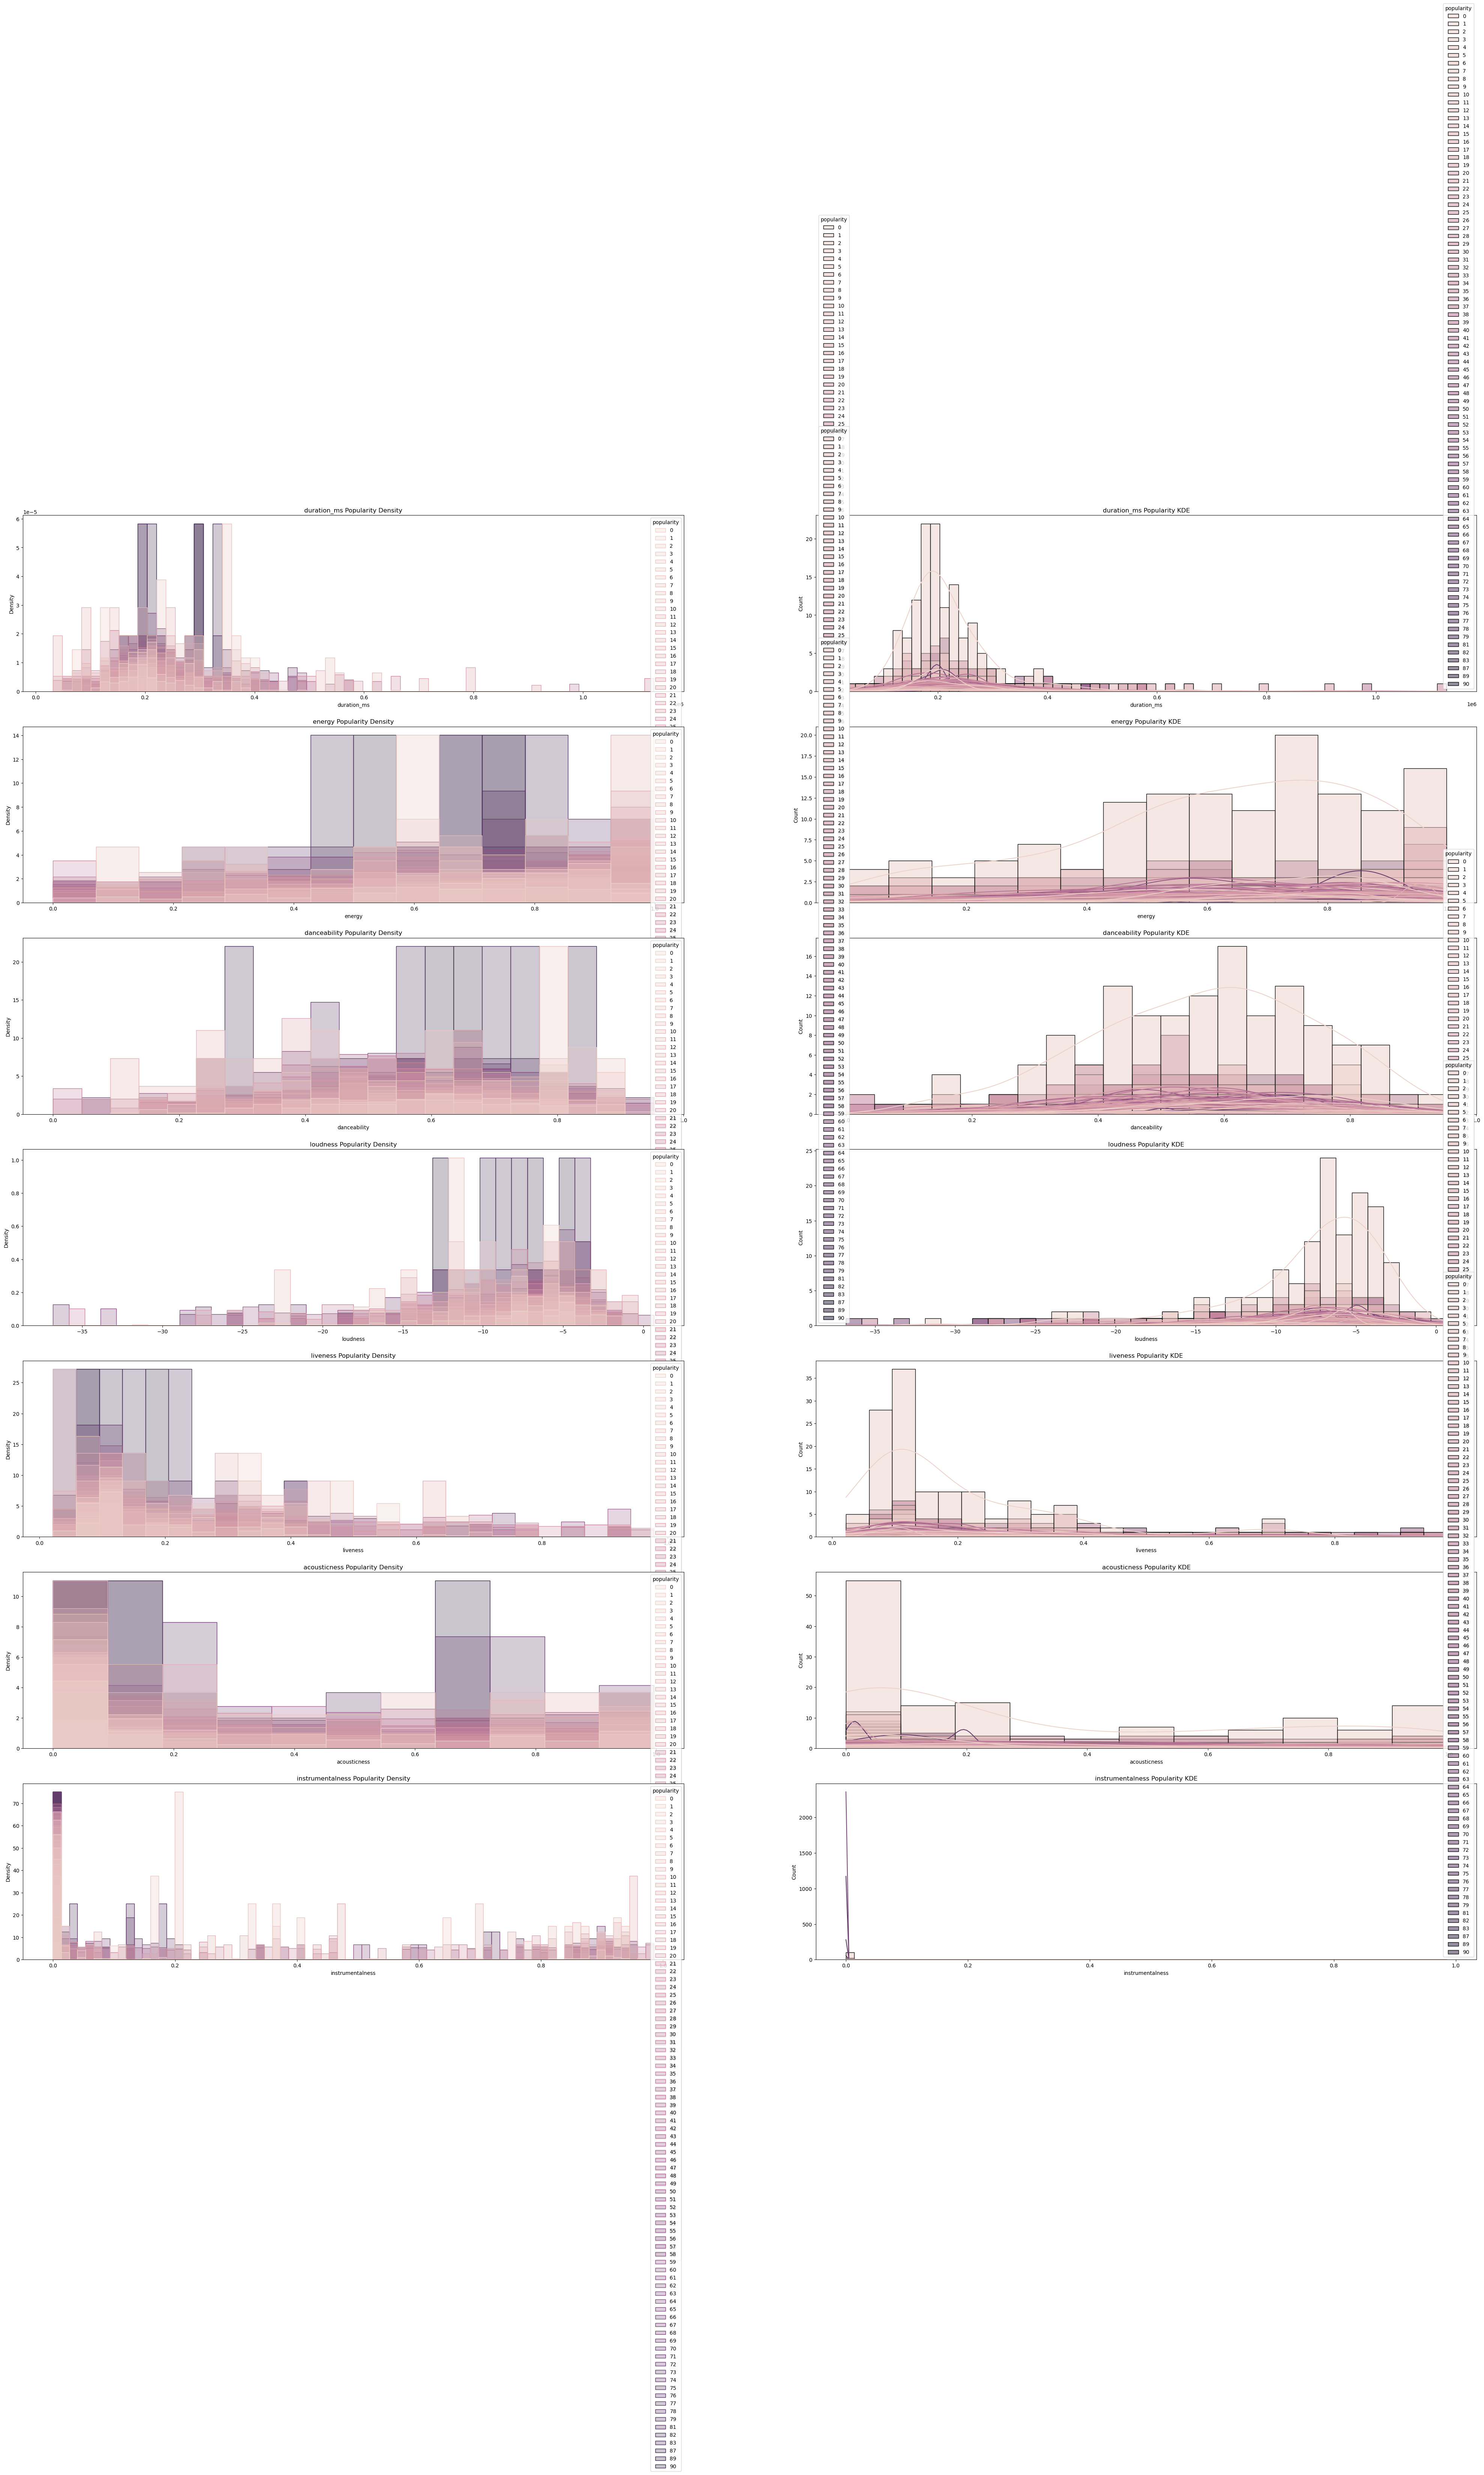

In [121]:
music_features = ['duration_ms', 'energy', 'danceability', 
                'loudness', 'liveness','acousticness','instrumentalness']

fig, axs = plt.subplots(len(music_features), 2, figsize=(50, 50))

for i, feature in enumerate(music_features):
    sns.histplot(data=sampled_df, x=feature, hue='popularity', element='step', stat='density', common_norm=False, ax=axs[i, 0])
    sns.histplot(data=sampled_df, x=feature, hue='popularity', kde=True, ax=axs[i, 1])
    axs[i, 0].set_title(f'{feature} Popularity Density')
    axs[i, 1].set_title(f'{feature} Popularity KDE')

plt.tight_layout()
plt.show()

### Model Approach

'Random Forest' was used for its ability to capture non-linear interactions between all of the 
features of a song that can influence its overall popularity. It also provides feature importance 
in the sense that there are more insights on features that are most predictive of song 
popularity. From the size of the dataset, 'Random Forest' appropriately selects features that are 
most relevant. Thus, this pipeline was chosen with the justification that it is robust to highly 
complex data and extracts most relevant features to better train the model. 

'Gradient Booster' was chosen on the basis that it iteratively improves the model and effectively 
incorporates different types of variables.

In order to prevent data leakage and biased evaluation of data, data was split and then 
normalized through Standard Scaler. This is also appropriate for any unseen data that the model 
will be tested on.

Cross-Validation was also performed in all training models in order to ensure model stability by sub-dividing the data, so that the model is trained multiple times.

### Encoding Dataset - Feature Engineering

In [22]:
freq_df=df_clean

In [23]:
freq_df['genre_freq_encoded'] = freq_df['track_genre'].map(freq_df['track_genre'].value_counts())
freq_df['artist_freq_encoded'] = freq_df['artists'].map(freq_df['artists'].value_counts())
freq_df['album_freq_encoded'] = freq_df['album_name'].map(freq_df['album_name'].value_counts())
freq_df['track_encoded'] = freq_df['track_name'].map(freq_df['track_name'].value_counts())

In [24]:
freq_columns=['track_genre', 'artists', 'album_name', 'track_name']

In [25]:
df_clean.drop(columns=freq_columns, inplace=True)
cleaned_df_freq = pd.concat([df_clean, freq_df], axis=1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Removing "track_id" column due to it being a string, while we only need float64 variables, as well as removing "Unnamed:0," since further clarification would be needed in understanding what this column measures.

In [27]:
column_to_remove = 'track_id'
cleaned_df_freq = cleaned_df_freq.drop(columns=[column_to_remove])

In [28]:
column_to_remove='Unnamed: 0'
cleaned_df_freq=cleaned_df_freq.drop(columns=[column_to_remove])

In [29]:
cleaned_df_freq.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_freq_encoded,artist_freq_encoded,album_freq_encoded,track_encoded
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,0.0322,0.000001,0.3580,0.715,87.917,4,1000,10,4,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,0.9240,0.000006,0.1010,0.267,77.489,4,1000,13,2,3
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,0.2100,0.000000,0.1170,0.120,76.332,4,1000,1,1,1
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,0.9050,0.000071,0.1320,0.143,181.740,3,1000,15,1,6
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,0.4690,0.000000,0.0829,0.167,119.949,4,1000,11,6,20


### Model Training 

Testing dataset with frequency encoded dataframe

In [30]:
X=cleaned_df_freq.drop(columns=['popularity'])
y=cleaned_df_freq['popularity']

In [31]:
X_clean_freq=X.dropna()

In [32]:
check_na = X_clean_freq.isna().any().any()

if check_na:
    print("X_clean_freq contains NaN values.")
else:
    print("X_clean_freq does not contain NaN values.")

X_clean_freq does not contain NaN values.


In [33]:
y_clean_freq = y.loc[X_clean_freq.index]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_clean_freq, y_clean_freq, test_size=0.2, random_state=42)

Normalizing dataset with StandardScaler in order to provide same weights to all features contributing to the model and to minimize biased evaluation of data.

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
X_train_transformed=scaler.fit_transform(X_train)
X_test_transformed=scaler.transform(X_test)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Random Forest Regressor Pipeline

In [38]:
pipeline_rf=Pipeline([
    ('scaler',StandardScaler()),
    ('random_forest_regressor',RandomForestRegressor())
])

In [39]:
param_grid_random_forest = {
    'random_forest_regressor__n_estimators': [50, 100],           
    'random_forest_regressor__max_depth': [None, 5, 20],                         
}

In [40]:
import os

num_cores = os.cpu_count()
print("Number of CPU cores:", num_cores)

Number of CPU cores: 16


In [41]:
gridsearch = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_random_forest, cv=5, scoring='neg_mean_squared_error', return_train_score=True, error_score='raise',n_jobs=16)

In [42]:
gridsearch.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('random_forest_regressor',
                                        RandomForestRegressor())]),
             n_jobs=16,
             param_grid={'random_forest_regressor__max_depth': [None, 5, 20],
                         'random_forest_regressor__n_estimators': [50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
best_model_rf = gridsearch.best_estimator_

In [45]:
y_pred = best_model_rf.predict(X_test_transformed)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print(mse)
print(mae)
print(r2)

156.29496425011502
8.63616101038841
0.6849460176004224


### One-Hot Encoding 

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [51]:
df_clean.head()

,Unnamed: 0,track_id,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_freq_encoded,artist_freq_encoded,album_freq_encoded,track_encoded
0,0,5SuOikwiRyPMVoIQDJUgSV,73,230666,False,0.676,0.4610,1,-6.746,0,...,0.0322,0.000001,0.3580,0.715,87.917,4,1000,10,4,4
1,1,4qPNDBW1i3p13qLCt0Ki3A,55,149610,False,0.420,0.1660,1,-17.235,1,...,0.9240,0.000006,0.1010,0.267,77.489,4,1000,13,2,3
2,2,1iJBSr7s7jYXzM8EGcbK5b,57,210826,False,0.438,0.3590,0,-9.734,1,...,0.2100,0.000000,0.1170,0.120,76.332,4,1000,1,1,1
3,3,6lfxq3CG4xtTiEg7opyCyx,71,201933,False,0.266,0.0596,0,-18.515,1,...,0.9050,0.000071,0.1320,0.143,181.740,3,1000,15,1,6
4,4,5vjLSffimiIP26QG5WcN2K,82,198853,False,0.618,0.4430,2,-9.681,1,...,0.4690,0.000000,0.0829,0.167,119.949,4,1000,11,6,20


In order to apply one_hot_encoding, must first reduce the array size to preserve memory through PCA technique.

In [127]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import recall_score, f1_score

In [53]:
numeric_data = df.select_dtypes(include=[np.number])

In [54]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [55]:
pca = PCA().fit(scaled_data)

Need to determine number of components for reduced dimensionality in PCA object.

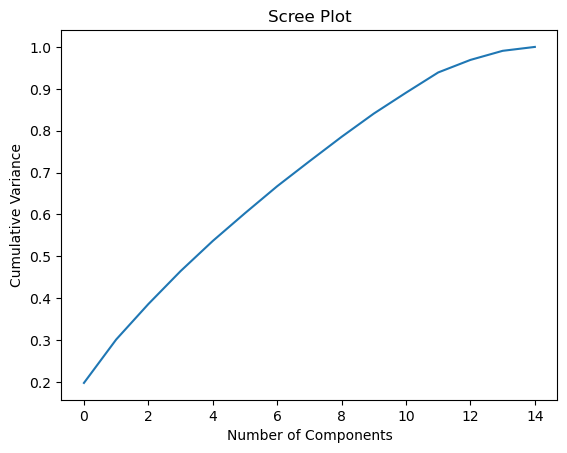

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Scree Plot')
plt.show()

'Elbow' can be found ~11 components.

In [57]:
pca = PCA(n_components=11) 

In [58]:
pca.fit(scaled_data)

PCA(n_components=11)

In [59]:
transformed_data = pca.transform(scaled_data)
transformed_df = pd.DataFrame(transformed_data, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.793074,-0.613565,-0.161396,0.733377,-0.040502,2.767606,0.170294,1.029864,-0.676866,0.131636,1.009180
1,3.226897,-1.157986,-0.239465,-0.548944,-0.987013,2.285649,-0.639736,0.326348,0.349741,-0.689046,1.002355
2,1.346187,0.282137,0.136570,-1.027990,-0.949606,2.446907,-0.182517,1.179667,0.263390,-0.993314,0.587504
3,3.749204,0.511278,-0.795604,-1.987973,-0.340993,1.448548,-2.910202,-0.088542,-0.308803,1.825697,1.231231
4,0.881085,-0.205476,0.546596,-1.090076,-0.384094,2.821148,-1.207664,0.208659,0.286520,0.014831,0.245749


In [60]:
one_hot_categorical_columns = ['track_genre', 'artists', 'album_name', 'track_name']
combined_df = pd.concat([transformed_df, pd.get_dummies(one_hot_categorical_columns)], axis=1)

In [61]:
one_hot_encoded_df = pd.get_dummies(combined_df)

In [62]:
one_hot_encoded_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,album_name,artists,track_genre,track_name
0,-0.793074,-0.613565,-0.161396,0.733377,-0.040502,2.767606,0.170294,1.029864,-0.676866,0.131636,1.009180,0.0,0.0,1.0,0.0
1,3.226897,-1.157986,-0.239465,-0.548944,-0.987013,2.285649,-0.639736,0.326348,0.349741,-0.689046,1.002355,0.0,1.0,0.0,0.0
2,1.346187,0.282137,0.136570,-1.027990,-0.949606,2.446907,-0.182517,1.179667,0.263390,-0.993314,0.587504,1.0,0.0,0.0,0.0
3,3.749204,0.511278,-0.795604,-1.987973,-0.340993,1.448548,-2.910202,-0.088542,-0.308803,1.825697,1.231231,0.0,0.0,0.0,1.0
4,0.881085,-0.205476,0.546596,-1.090076,-0.384094,2.821148,-1.207664,0.208659,0.286520,0.014831,0.245749,NaN,NaN,NaN,NaN


In [63]:
one_hot_encoded_df.fillna(0, inplace=True)

In [64]:
one_hot_encoded_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,album_name,artists,track_genre,track_name
0,-0.793074,-0.613565,-0.161396,0.733377,-0.040502,2.767606,0.170294,1.029864,-0.676866,0.131636,1.009180,0.0,0.0,1.0,0.0
1,3.226897,-1.157986,-0.239465,-0.548944,-0.987013,2.285649,-0.639736,0.326348,0.349741,-0.689046,1.002355,0.0,1.0,0.0,0.0
2,1.346187,0.282137,0.136570,-1.027990,-0.949606,2.446907,-0.182517,1.179667,0.263390,-0.993314,0.587504,1.0,0.0,0.0,0.0
3,3.749204,0.511278,-0.795604,-1.987973,-0.340993,1.448548,-2.910202,-0.088542,-0.308803,1.825697,1.231231,0.0,0.0,0.0,1.0
4,0.881085,-0.205476,0.546596,-1.090076,-0.384094,2.821148,-1.207664,0.208659,0.286520,0.014831,0.245749,0.0,0.0,0.0,0.0


In [65]:
df.drop(columns=one_hot_categorical_columns, inplace=True)
cleaned_df = pd.concat([df_clean, one_hot_encoded_df], axis=1)

In [66]:
cleaned_df.head()

,Unnamed: 0,track_id,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,PC6,PC7,PC8,PC9,PC10,PC11,album_name,artists,track_genre,track_name
0,0.0,5SuOikwiRyPMVoIQDJUgSV,73.0,230666.0,False,0.676,0.4610,1.0,-6.746,0.0,...,2.767606,0.170294,1.029864,-0.676866,0.131636,1.009180,0.0,0.0,1.0,0.0
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,55.0,149610.0,False,0.420,0.1660,1.0,-17.235,1.0,...,2.285649,-0.639736,0.326348,0.349741,-0.689046,1.002355,0.0,1.0,0.0,0.0
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,57.0,210826.0,False,0.438,0.3590,0.0,-9.734,1.0,...,2.446907,-0.182517,1.179667,0.263390,-0.993314,0.587504,1.0,0.0,0.0,0.0
3,3.0,6lfxq3CG4xtTiEg7opyCyx,71.0,201933.0,False,0.266,0.0596,0.0,-18.515,1.0,...,1.448548,-2.910202,-0.088542,-0.308803,1.825697,1.231231,0.0,0.0,0.0,1.0
4,4.0,5vjLSffimiIP26QG5WcN2K,82.0,198853.0,False,0.618,0.4430,2.0,-9.681,1.0,...,2.821148,-1.207664,0.208659,0.286520,0.014831,0.245749,0.0,0.0,0.0,0.0


Removing "track_id" column due to it being a string, while we only need float64 variables, as well as removing "Unnamed:0," since further clarification would be needed in understanding what this column measures.

In [79]:
column_to_remove='Unnamed: 0'
cleaned_df=cleaned_df.drop(columns=[column_to_remove])

In [80]:
column_to_remove='track_id'
cleaned_df=cleaned_df.drop(columns=[column_to_remove])

## Model Training

In [81]:
X=cleaned_df.drop(columns=['popularity'])
y=cleaned_df['popularity']

In [82]:
X_clean_onehot=X.dropna()

In [83]:
check_na = X_clean_onehot.isna().any().any()

if check_na:
    print("X_clean_onehot contains NaN values.")
else:
    print("X_clean_onehot does not contain NaN values.")

X_clean_onehot does not contain NaN values.


In [84]:
X_clean_onehot.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,PC6,PC7,PC8,PC9,PC10,PC11,album_name,artists,track_genre,track_name
0,230666.0,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,...,2.767606,0.170294,1.029864,-0.676866,0.131636,1.009180,0.0,0.0,1.0,0.0
1,149610.0,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,...,2.285649,-0.639736,0.326348,0.349741,-0.689046,1.002355,0.0,1.0,0.0,0.0
2,210826.0,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,...,2.446907,-0.182517,1.179667,0.263390,-0.993314,0.587504,1.0,0.0,0.0,0.0
3,201933.0,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,...,1.448548,-2.910202,-0.088542,-0.308803,1.825697,1.231231,0.0,0.0,0.0,1.0
4,198853.0,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,...,2.821148,-1.207664,0.208659,0.286520,0.014831,0.245749,0.0,0.0,0.0,0.0


In [85]:
y_clean_onehot = y.loc[X_clean_onehot.index]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_clean_onehot, y_clean_onehot, test_size=0.2, random_state=42)

In [87]:
X_train_transformed_onehot=scaler.fit_transform(X_train)
X_test_transformed_onehot=scaler.transform(X_test)

Random Forest Regressor Pipeline

In [88]:
pipeline_rf=Pipeline([
    ('scaler',StandardScaler()),
    ('random_forest_regressor',RandomForestRegressor())
])

In [89]:
param_grid_random_forest = {
    'random_forest_regressor__n_estimators': [50, 100],           
    'random_forest_regressor__max_depth': [None, 5, 20],                         
}

In [90]:
import os

num_cores = os.cpu_count()
print("Number of CPU cores:", num_cores)

Number of CPU cores: 16


In [91]:
gridsearch = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_random_forest, cv=5, scoring='neg_mean_squared_error', return_train_score=True, error_score='raise',n_jobs=16)

In [92]:
gridsearch.fit(X_train_transformed_onehot,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('random_forest_regressor',
                                        RandomForestRegressor())]),
             n_jobs=16,
             param_grid={'random_forest_regressor__max_depth': [None, 5, 20],
                         'random_forest_regressor__n_estimators': [50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [93]:
best_model_rf = gridsearch.best_estimator_

In [94]:
y_pred_onehot = best_model_rf.predict(X_test_transformed_onehot)

In [130]:
y_pred_onehot = best_model_rf.predict(X_test_transformed_onehot)
mse_onehot = mean_squared_error(y_test, y_pred_onehot)
mae_onehot = mean_absolute_error(y_test, y_pred_onehot)
r2_onehot = r2_score(y_test, y_pred_onehot)

In [131]:
print(mse_onehot)
print(mae_onehot)
print(r2_onehot)

71.42668788596491
4.842137719298245
0.8558660256019683


Higher R2 and lower MSE value found using 'One-Hot Encoder,' thus, this training variable used for Gradient Boosting Regressor Pipeline below.

Gradient Booster Pipeline 

In [97]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [98]:
gradientboost_regressor=GradientBoostingRegressor()

In [99]:
pipeline_gb=Pipeline([
    ('scaler',StandardScaler()),
    ('gradientboost_regressor',GradientBoostingRegressor())
])

In [100]:
param_grid_boosting = {
    'gradientboost_regressor__n_estimators': [50, 100],           
    'gradientboost_regressor__learning_rate': [0.01,0.1,1],                         
}

In [101]:
gridsearch2 = GridSearchCV(estimator=pipeline_gb, param_grid=param_grid_boosting, cv=5, scoring='neg_mean_squared_error', return_train_score=True, error_score='raise',n_jobs=16)

In [102]:
gridsearch2.fit(X_train_transformed_onehot,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gradientboost_regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=16,
             param_grid={'gradientboost_regressor__learning_rate': [0.01, 0.1,
                                                                    1],
                         'gradientboost_regressor__n_estimators': [50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [103]:
best_model_gb = gridsearch2.best_estimator_

In [105]:
y_pred = best_model_gb.predict(X_test_transformed_onehot)

In [106]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [107]:
print(mse)
print(mae)
print(r2)

84.93470060224026
5.724131989871057
0.8286078169877832


'Stacked Ensemble' of Random Forest Regressor and Gradient Booster with Linear Regression as 'metaregressor'

In [108]:
from sklearn.ensemble import StackingRegressor

In [109]:
base_regressors = [
    ('rf', best_model_rf),
    ('gb',best_model_gb)
]

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
meta_regressor = LinearRegression()

In [112]:
stacked_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=meta_regressor,
    cv=5,
    n_jobs=16
)

In [113]:
pipeline_stacked = Pipeline([
    ('scaler', StandardScaler()),
    ('stacked_regressor', stacked_regressor)
])

In [114]:
stacked_regressor.fit(X_train_transformed_onehot,y_train)

StackingRegressor(cv=5,
                  estimators=[('rf',
                               Pipeline(steps=[('scaler', StandardScaler()),
                                               ('random_forest_regressor',
                                                RandomForestRegressor())])),
                              ('gb',
                               Pipeline(steps=[('scaler', StandardScaler()),
                                               ('gradientboost_regressor',
                                                GradientBoostingRegressor(learning_rate=1))]))],
                  final_estimator=LinearRegression(), n_jobs=16)

In [115]:
predictions = stacked_regressor.predict(X_test_transformed_onehot)

In [116]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

In [117]:
print(f'final r2 score is {r2}')
print(f'final mse score is {mse}')

final r2 score is 0.8608086720174549
final mse score is 68.97732184076919


### Model Justification

The final model is a stacked ensemble of random forest regression and gradient booster, with 
linear regression as the metaregressor, due to the target variable being continuous, popularity. Having linear regression as a metaregressor also minimizes the risk of overfitting as it reduces the errors of each individual model used in the stacked model by accounting for their individual predictions.

Random Forest was chosen as a pipeline for the model primarily for its feature importance as it 
thoroughly analyzes each feature of every song and measures their influence to the song's 
overall popularity. Gradient booster was chosen as another pipeline for the model due to its 
ability to handle non-linear interactions between variables and handling of larger datasets, 
which was well needed for a dataset of ~114,000 records. 

Regularization techniques used for Random Forest Regressor pipeline were: (1) n_estimators 
and (2) max_depth to establish how many decision trees and respective features would be 
considered for evaluation. As for 'n_estimators,' more decision trees were chosen in order to 
reduce overall variance. On the other hand, 'max depth' was used to capture as many patterns 
as possible within each decision tree to better generalize the overall model. 

As for Gradient Booster, regularization techniques utilized included: (1) n_estimators, as well as 
(2) learning_rate. 'Learning_rate' decides how much each decision tree influence the overall 
resulting model. In combining 'learning_rate' with 'n_estimators,' there is more flexibility 
among more decision trees formed and scales contributions of each tree towards the 
performance of the overall model. 

The Stacked Ensemble in combining Random Forest Regressor with Gradient Booster permits 
for maximum flexibility within the model, while attempting to prevent as much overfitting and 
underfitting as possible. The model appropriately trains on the data, while capturing as many 
complex patterns between features involved.

### Results & Insights

When using the stacked ensemble, including both random forest and gradient booster, the r2 
score increased slightly while the mse score substantially decreased compared to the individual 
models. This aligns with the initial objective in building a model that can explain for majority of 
variance in unseen data, while remaining accurate. The predictions are close to actual values 
according to the r2 value of 0.861, but as always, should be taken with caution as with time, 
distributions of data can change which can alter the performance of the model. Continuous 
monitoring of the model will be needed in order to prevent degradation of performance over 
t
 ime with additional unseen data.  

### Future Directions

As for improvements to the model, a key enhancement would be to explore more encoding 
strategies rather than 'One-Hot Encoding' for categorical variables involved, as there were 125 
genres in total that were condensed to being grouped in 11 categories, which in turn, resulted 
in non-representative data being analyzed. Although 'One-Hot Encoding' is an appropriate 
encoding strategy for non-ordinal categorical features, it can result in 'feature explosion' from 
high cardinality in feature columns. 'Frequency Encoding' was initially used, but the encoding 
strategy can oversimplify the categorical columns from providing a singular value to represent 
categories, increasing the chances of missing complex patterns between 'popularity' and other 
key variables. It would have been more preferred to not oversimplify the dataset in order to 
sustain all interactions and provide as much of a representative analysis as possible. 

Furthermore, additional variables that were missing, but would have been helpful in this 
analysis are: (1) release date of songs, (2) user engagement metrics, and (3) locations songs are 
most streamed. These variables would have provided insight into additional influences to a 
song’s popularity. Release date aligns with seasonality and trends of music, while user 
engagement and geographic metrics involve how often a song is added to a playlist or is played 
across all streaming platforms in different locations.  

In the future, music production companies should be able to fine-tune certain features of songs 
in order to increase the song's popularity. This model can be further developed into an 
application that can extract properties and quantify them in order to provide insight on how 
popular the song would be; in turn, production companies can better focus on areas that are 
lower in value to increase the song's overall popularity.